# Package Installation and Import

In [ ]:
# install packages


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Data Preprocessing

In [ ]:
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['credit_risk_dataset.csv']))
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [ ]:
df.shape

(32581, 12)

In [ ]:
# check for null value
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# remove rows with person_emp_length, drop loan_int_rate column
df = df[df['person_emp_length'].notna()]
df = df.drop(columns=['loan_int_rate', 'loan_grade'], axis=1)
df.shape

(31686, 10)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,0.215426,0.169612,5.809316
std,6.360283,6.242729e+04,4.142630,6336.226458,0.411124,0.106297,4.060867
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,2.000000
25%,23.000000,3.939700e+04,2.000000,5000.000000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,1.000000,0.830000,30.000000


In [ ]:
# remove the 2 records whose age above 100
df.drop(df.loc[df['person_age']>100].index, inplace=True)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31681.000000,3.168100e+04,31681.000000,31681.000000,31681.000000,31681.000000,31681.000000
mean,27.730280,6.649382e+04,4.789527,9661.088665,0.215460,0.169621,5.809065
std,6.213429,5.277186e+04,4.142706,6336.026596,0.411148,0.106292,4.059625
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,2.000000
25%,23.000000,3.939600e+04,2.000000,5000.000000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,123.000000,35000.000000,1.000000,0.830000,30.000000


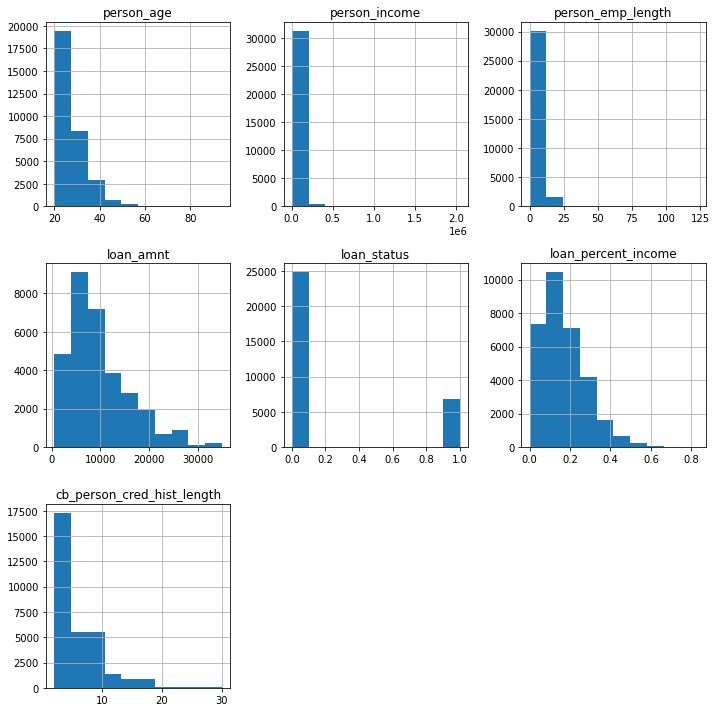

In [ ]:
df.hist(figsize=(10,10))
plt.tight_layout()

# Data Exploration

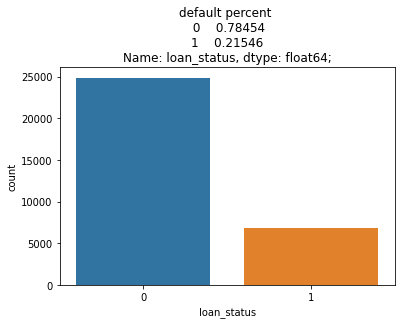

In [ ]:
# Bivariate analysis
# percentage of default
sns.countplot(x=df['loan_status'])
normalise_count = df['loan_status'].value_counts(normalize=True)
ax = plt.title('default percent \n {};'.format(normalise_count))

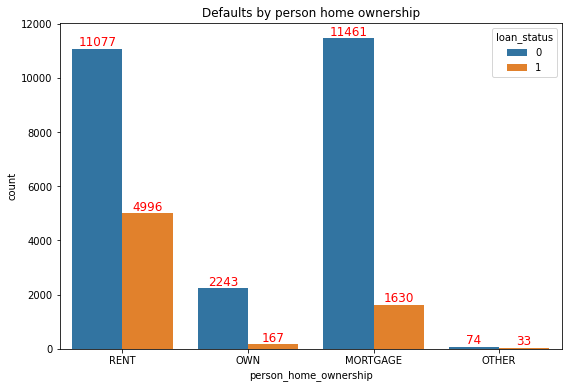

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x= df['person_home_ownership'], hue=df['loan_status'])
plt.title('Defaults by person home ownership')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='red', ha='center', va='bottom')

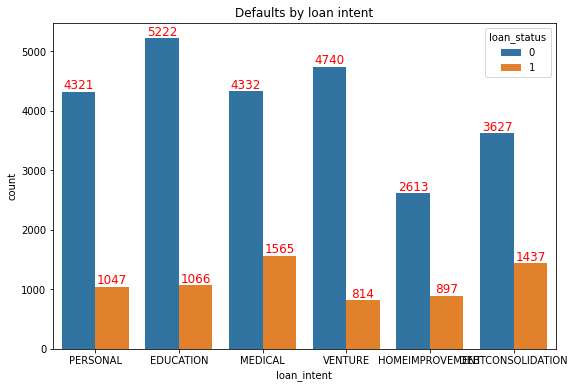

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x= df['loan_intent'], hue=df['loan_status'])
plt.title('Defaults by loan intent')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='red', ha='center', va='bottom')

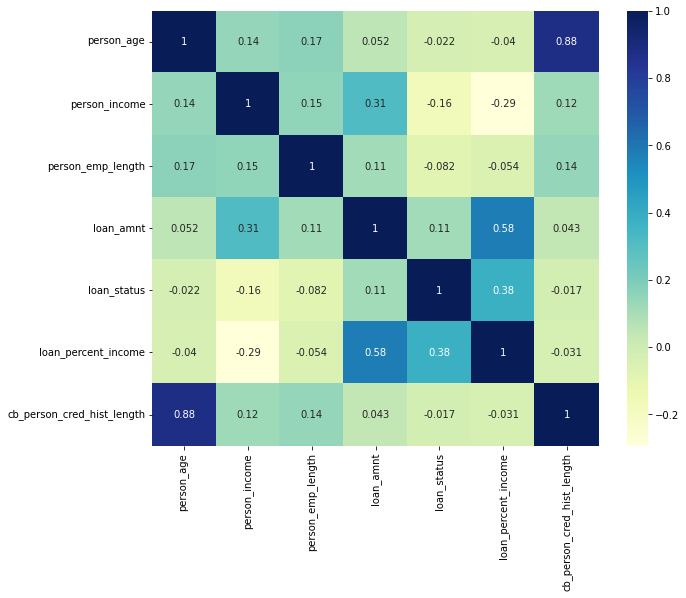

In [ ]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

In [ ]:
# remove loan_amnt and person_income because the dataset has aggregated the column into loan_percent_income
df = df.drop(columns=['loan_amnt', 'person_income'], axis=1)
df.shape

(31681, 8)

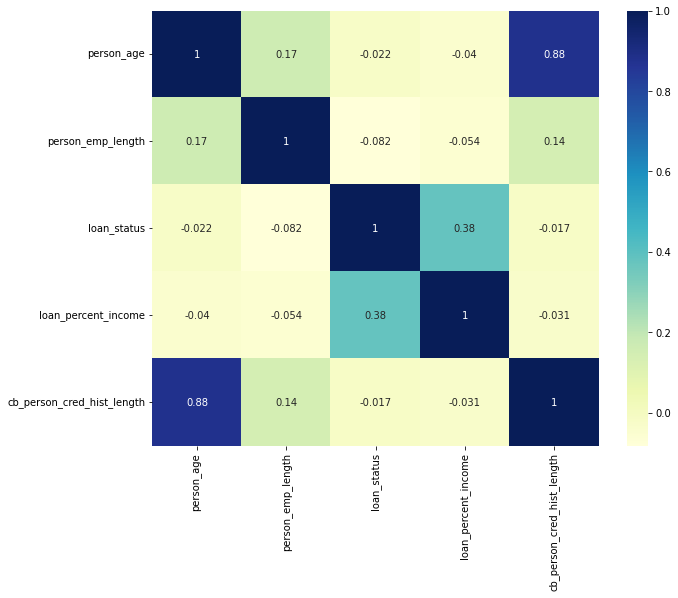

In [ ]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

## Evaluation of Aggregated column - loan_percent_income (Dropping person_income & loan_amnt)

In [ ]:
#Dropping person_income & loan_amn (KEEPING loan_percent_income)
X = df.drop(['loan_status', 'person_income', 'loan_amnt'] , axis = 1)
y = df['loan_status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#Filtering out numeric columns
data_numeric = X.select_dtypes(include=[np.number])
data_numeric

,person_age,person_emp_length,loan_percent_income,cb_person_cred_hist_length
0,22,123.0,0.59,3
1,21,5.0,0.10,2
2,25,1.0,0.57,3
3,23,4.0,0.53,2
4,24,8.0,0.55,4
...,...,...,...,...
32576,57,1.0,0.11,30
32577,54,4.0,0.15,19
32578,65,3.0,0.46,28
32579,56,5.0,0.10,26


In [ ]:
numeric_cols = data_numeric.columns.values
#Standardise to the same scale
for col in numeric_cols:
        X[col] = scaler.fit_transform(X[[col]])

print(X.head())

   person_age person_home_ownership  person_emp_length loan_intent  \
0    0.027027                  RENT           1.000000    PERSONAL   
1    0.013514                   OWN           0.040650   EDUCATION   
2    0.067568              MORTGAGE           0.008130     MEDICAL   
3    0.040541                  RENT           0.032520     MEDICAL   
4    0.054054                  RENT           0.065041     MEDICAL   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0             0.710843                         Y                    0.035714  
1             0.120482                         N                    0.000000  
2             0.686747                         N                    0.035714  
3             0.638554                         N                    0.000000  
4             0.662651                         Y                    0.071429  


In [ ]:
#Perform one hot encoding on the categorical columns so that it can be used for the logistic regression model
data_category = X.select_dtypes(exclude=[np.number])
categorical_cols = data_category.columns.values

#dummy variable encoding
X = pd.get_dummies(X,columns=categorical_cols)
X.head()

,person_age,person_emp_length,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.027027,1.000000,0.710843,0.035714,0,0,0,1,0,0,0,0,1,0,0,1
1,0.013514,0.040650,0.120482,0.000000,0,0,1,0,0,1,0,0,0,0,1,0
2,0.067568,0.008130,0.686747,0.035714,1,0,0,0,0,0,0,1,0,0,1,0
3,0.040541,0.032520,0.638554,0.000000,0,0,0,1,0,0,0,1,0,0,1,0
4,0.054054,0.065041,0.662651,0.071429,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
#To ensure that there are no missing values/ there are values for each row
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681 entries, 0 to 32580
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      31681 non-null  float64
 1   person_emp_length               31681 non-null  float64
 2   loan_percent_income             31681 non-null  float64
 3   cb_person_cred_hist_length      31681 non-null  float64
 4   person_home_ownership_MORTGAGE  31681 non-null  uint8  
 5   person_home_ownership_OTHER     31681 non-null  uint8  
 6   person_home_ownership_OWN       31681 non-null  uint8  
 7   person_home_ownership_RENT      31681 non-null  uint8  
 8   loan_intent_DEBTCONSOLIDATION   31681 non-null  uint8  
 9   loan_intent_EDUCATION           31681 non-null  uint8  
 10  loan_intent_HOMEIMPROVEMENT     31681 non-null  uint8  
 11  loan_intent_MEDICAL             31681 non-null  uint8  
 12  loan_intent_PERSONAL            

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25344, 16) (6337, 16) (25344,) (6337,)


In [ ]:
#Percentage of loan_status = 1 (78.46%) and = 0 (21.54%).
y_test.value_counts(normalize= True)

0    0.784598
1    0.215402
Name: loan_status, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
coeff = logreg.coef_.reshape(-1)
coeff

array([-0.74903958, -1.65347141,  7.38054135,  0.22933285, -0.12212706,
        0.48483997, -1.24584713,  0.88666639,  0.35395855, -0.37381561,
        0.45616036,  0.26574383, -0.12974537, -0.5687696 , -0.53881067,
        0.54234284])

In [ ]:
logreg.intercept_

array([-3.01790433])

In [ ]:
df_coeff1 = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : (coeff)})
df_coeff1

,Variable,coefficient
0,person_age,-0.749040
1,person_emp_length,-1.653471
2,loan_percent_income,7.380541
3,cb_person_cred_hist_length,0.229333
4,person_home_ownership_MORTGAGE,-0.122127
5,person_home_ownership_OTHER,0.484840
6,person_home_ownership_OWN,-1.245847
7,person_home_ownership_RENT,0.886666
8,loan_intent_DEBTCONSOLIDATION,0.353959
9,loan_intent_EDUCATION,-0.373816


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))

#print the f1-score
#Look at row 1 as loan_status = 1 means default
print(classification_report(y_test, y_pred))

Testing accuracy 0.834937667666088
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4972
           1       0.74      0.36      0.49      1365

    accuracy                           0.83      6337
   macro avg       0.79      0.66      0.69      6337
weighted avg       0.82      0.83      0.81      6337



## Evaluation of before Aggregated columns - person_income & loan_amnt (Dropping loan_percent_income)

In [ ]:
#Dropping loan_percent_income (KEEPING person_income & loan_amnt)
X = df.drop(['loan_status', 'loan_percent_income'] , axis = 1)
y = df['loan_status']

In [ ]:
#Filtering out numeric columns
data_numeric = X.select_dtypes(include=[np.number])
data_numeric

,person_age,person_income,person_emp_length,loan_amnt,cb_person_cred_hist_length
0,22,59000,123.0,35000,3
1,21,9600,5.0,1000,2
2,25,9600,1.0,5500,3
3,23,65500,4.0,35000,2
4,24,54400,8.0,35000,4
...,...,...,...,...,...
32576,57,53000,1.0,5800,30
32577,54,120000,4.0,17625,19
32578,65,76000,3.0,35000,28
32579,56,150000,5.0,15000,26


In [ ]:
numeric_cols = data_numeric.columns.values
#Standardise to the same scale
for col in numeric_cols:
        X[col] = scaler.fit_transform(X[[col]])

print(X.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0    0.027027       0.027017                  RENT           1.000000   
1    0.013514       0.002751                   OWN           0.040650   
2    0.067568       0.002751              MORTGAGE           0.008130   
3    0.040541       0.030209                  RENT           0.032520   
4    0.054054       0.024757                  RENT           0.065041   

  loan_intent  loan_amnt cb_person_default_on_file  cb_person_cred_hist_length  
0    PERSONAL   1.000000                         Y                    0.035714  
1   EDUCATION   0.014493                         N                    0.000000  
2     MEDICAL   0.144928                         N                    0.035714  
3     MEDICAL   1.000000                         N                    0.000000  
4     MEDICAL   1.000000                         Y                    0.071429  


In [ ]:
#Perform one hot encoding on the categorical columns so that it can be used for the logistic regression model
data_category = X.select_dtypes(exclude=[np.number])
categorical_cols = data_category.columns.values

#dummy variable encoding
X = pd.get_dummies(X,columns=categorical_cols)
X.head()

,person_age,person_income,person_emp_length,loan_amnt,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.027027,0.027017,1.000000,1.000000,0.035714,0,0,0,1,0,0,0,0,1,0,0,1
1,0.013514,0.002751,0.040650,0.014493,0.000000,0,0,1,0,0,1,0,0,0,0,1,0
2,0.067568,0.002751,0.008130,0.144928,0.035714,1,0,0,0,0,0,0,1,0,0,1,0
3,0.040541,0.030209,0.032520,1.000000,0.000000,0,0,0,1,0,0,0,1,0,0,1,0
4,0.054054,0.024757,0.065041,1.000000,0.071429,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
#To ensure that there are no missing values/ there are values for each row
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681 entries, 0 to 32580
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      31681 non-null  float64
 1   person_income                   31681 non-null  float64
 2   person_emp_length               31681 non-null  float64
 3   loan_amnt                       31681 non-null  float64
 4   cb_person_cred_hist_length      31681 non-null  float64
 5   person_home_ownership_MORTGAGE  31681 non-null  uint8  
 6   person_home_ownership_OTHER     31681 non-null  uint8  
 7   person_home_ownership_OWN       31681 non-null  uint8  
 8   person_home_ownership_RENT      31681 non-null  uint8  
 9   loan_intent_DEBTCONSOLIDATION   31681 non-null  uint8  
 10  loan_intent_EDUCATION           31681 non-null  uint8  
 11  loan_intent_HOMEIMPROVEMENT     31681 non-null  uint8  
 12  loan_intent_MEDICAL             

In [ ]:
#Stratify based on y meaning equal distribution of loan_status=1 & =0 when splitting.
#Eg. Dataset (50% status = 1 50% status = 0). When splitting into test, test dataset will also have 50% 0 & 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25344, 17) (6337, 17) (25344,) (6337,)


In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
coeff = logreg.coef_.reshape(-1)
coeff

array([ -0.99725669, -20.35716559,  -1.88153205,   2.79239923,
         0.31838806,  -0.30131602,   0.52130275,  -1.00873653,
         0.78864699,   0.3238351 ,  -0.3472638 ,   0.38188904,
         0.24426361,  -0.11514203,  -0.48768472,  -0.48249343,
         0.48239062])

In [ ]:
df_coeff1 = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : (coeff)})
df_coeff1

,Variable,coefficient
0,person_age,-0.997257
1,person_income,-20.357166
2,person_emp_length,-1.881532
3,loan_amnt,2.792399
4,cb_person_cred_hist_length,0.318388
5,person_home_ownership_MORTGAGE,-0.301316
6,person_home_ownership_OTHER,0.521303
7,person_home_ownership_OWN,-1.008737
8,person_home_ownership_RENT,0.788647
9,loan_intent_DEBTCONSOLIDATION,0.323835


In [ ]:
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))

#print the f1-score
#Look at row 1 as loan_status = 1 means default
print(classification_report(y_test, y_pred))

Testing accuracy 0.804797222660565
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4972
           1       0.68      0.18      0.28      1365

    accuracy                           0.80      6337
   macro avg       0.75      0.58      0.58      6337
weighted avg       0.78      0.80      0.76      6337



## Evaluation of highly correlated attribute (Dropping Age)

In [ ]:
#Attributes are considered highly correlated when they have a score of more than 0.5 ~ 1.0
#From the correlation graph above, we can see that there is a high correlation between
#   - person_age & cb_person_cred_history_length
#   - loan_percent_income & loan_amnt

#We will test which to drop based on the evaluation metrics

In [ ]:
#Dropping person_age (KEEPING cb_person_cred_history_length)
X = df.drop(['loan_status', 'person_age'] , axis = 1)
y = df['loan_status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#Filtering out numeric columns
data_numeric = X.select_dtypes(include=[np.number])
data_numeric

,person_emp_length,loan_percent_income,cb_person_cred_hist_length
0,123.0,0.59,3
1,5.0,0.10,2
2,1.0,0.57,3
3,4.0,0.53,2
4,8.0,0.55,4
...,...,...,...
32576,1.0,0.11,30
32577,4.0,0.15,19
32578,3.0,0.46,28
32579,5.0,0.10,26


In [ ]:
numeric_cols = data_numeric.columns.values
#Standardise to the same scale
for col in numeric_cols:
        X[col] = scaler.fit_transform(X[[col]])

print(X.head())

  person_home_ownership  person_emp_length loan_intent  loan_percent_income  \
0                  RENT           1.000000    PERSONAL             0.710843   
1                   OWN           0.040650   EDUCATION             0.120482   
2              MORTGAGE           0.008130     MEDICAL             0.686747   
3                  RENT           0.032520     MEDICAL             0.638554   
4                  RENT           0.065041     MEDICAL             0.662651   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y                    0.035714  
1                         N                    0.000000  
2                         N                    0.035714  
3                         N                    0.000000  
4                         Y                    0.071429  


In [ ]:
#Perform one hot encoding on the categorical columns so that it can be used for the logistic regression model
data_category = X.select_dtypes(exclude=[np.number])
categorical_cols = data_category.columns.values

#dummy variable encoding
X = pd.get_dummies(X,columns=categorical_cols)
X.head()

,person_emp_length,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,1.000000,0.710843,0.035714,0,0,0,1,0,0,0,0,1,0,0,1
1,0.040650,0.120482,0.000000,0,0,1,0,0,1,0,0,0,0,1,0
2,0.008130,0.686747,0.035714,1,0,0,0,0,0,0,1,0,0,1,0
3,0.032520,0.638554,0.000000,0,0,0,1,0,0,0,1,0,0,1,0
4,0.065041,0.662651,0.071429,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
#To ensure that there are no missing values/ there are values for each row
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681 entries, 0 to 32580
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_emp_length               31681 non-null  float64
 1   loan_percent_income             31681 non-null  float64
 2   cb_person_cred_hist_length      31681 non-null  float64
 3   person_home_ownership_MORTGAGE  31681 non-null  uint8  
 4   person_home_ownership_OTHER     31681 non-null  uint8  
 5   person_home_ownership_OWN       31681 non-null  uint8  
 6   person_home_ownership_RENT      31681 non-null  uint8  
 7   loan_intent_DEBTCONSOLIDATION   31681 non-null  uint8  
 8   loan_intent_EDUCATION           31681 non-null  uint8  
 9   loan_intent_HOMEIMPROVEMENT     31681 non-null  uint8  
 10  loan_intent_MEDICAL             31681 non-null  uint8  
 11  loan_intent_PERSONAL            31681 non-null  uint8  
 12  loan_intent_VENTURE             

In [ ]:
#!pip install sklearn

In [ ]:
#Stratify based on y meaning equal distribution of loan_status=1 & =0 when splitting.
#Eg. Dataset (50% status = 1 50% status = 0). When splitting into test, test dataset will also have 50% 0 & 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25344, 15) (6337, 15) (25344,) (6337,)


In [ ]:
#Percentage of loan_status = 1 (78.46%) and = 0 (21.54%).
y_test.value_counts(normalize= True)

0    0.784598
1    0.215402
Name: loan_status, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
coeff = logreg.coef_.reshape(-1)
coeff

array([-1.71716921,  7.38510667, -0.14235819, -0.12341557,  0.48661784,
       -1.24552532,  0.88567619,  0.35414477, -0.36977644,  0.45210993,
        0.26441925, -0.12987069, -0.56767368, -0.53845366,  0.54180679])

In [ ]:
logreg.intercept_

array([-3.04316576])

In [ ]:
df_coeff1 = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : (coeff)})
df_coeff1

,Variable,coefficient
0,person_emp_length,-1.717169
1,loan_percent_income,7.385107
2,cb_person_cred_hist_length,-0.142358
3,person_home_ownership_MORTGAGE,-0.123416
4,person_home_ownership_OTHER,0.486618
5,person_home_ownership_OWN,-1.245525
6,person_home_ownership_RENT,0.885676
7,loan_intent_DEBTCONSOLIDATION,0.354145
8,loan_intent_EDUCATION,-0.369776
9,loan_intent_HOMEIMPROVEMENT,0.452110


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))

#print the f1-score
#Look at row 1 as loan_status = 1 means default
print(classification_report(y_test, y_pred))

Testing accuracy 0.8341486507811268
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4972
           1       0.73      0.36      0.48      1365

    accuracy                           0.83      6337
   macro avg       0.79      0.66      0.69      6337
weighted avg       0.82      0.83      0.81      6337



In [ ]:
#predicts the probabilities for the classes
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.64402903, 0.35597097],
       [0.55500804, 0.44499196],
       [0.9863342 , 0.0136658 ],
       ...,
       [0.09722687, 0.90277313],
       [0.8721333 , 0.1278667 ],
       [0.7853379 , 0.2146621 ]])

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#print the AUC metric
y_test_predictions = y_pred_proba[: , 1]
roc_auc_score(y_test, y_test_predictions)

0.7918392079896505

In [ ]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


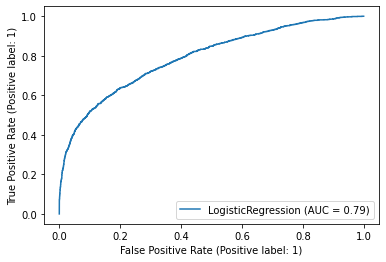

In [ ]:
plot_roc_curve(logreg , X_test, y_test)

## Evaluation of highly correlated variables (Dropping cb_person_cred_hist_length)

In [ ]:
#Dropping cb_person_cred_hist_length (KEEPING person_age)
X = df.drop(['loan_status', 'cb_person_cred_hist_length'] , axis = 1)
y = df['loan_status']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
#Filtering out numeric columns
data_numeric = X.select_dtypes(include=[np.number])
data_numeric

,person_age,person_emp_length,loan_percent_income
0,22,123.0,0.59
1,21,5.0,0.10
2,25,1.0,0.57
3,23,4.0,0.53
4,24,8.0,0.55
...,...,...,...
32576,57,1.0,0.11
32577,54,4.0,0.15
32578,65,3.0,0.46
32579,56,5.0,0.10


In [ ]:
numeric_cols = data_numeric.columns.values
#Standardise to the same scale
for col in numeric_cols:
        X[col] = scaler.fit_transform(X[[col]])

print(X.head())

   person_age person_home_ownership  person_emp_length loan_intent  \
0    0.027027                  RENT           1.000000    PERSONAL   
1    0.013514                   OWN           0.040650   EDUCATION   
2    0.067568              MORTGAGE           0.008130     MEDICAL   
3    0.040541                  RENT           0.032520     MEDICAL   
4    0.054054                  RENT           0.065041     MEDICAL   

   loan_percent_income cb_person_default_on_file  
0             0.710843                         Y  
1             0.120482                         N  
2             0.686747                         N  
3             0.638554                         N  
4             0.662651                         Y  


In [ ]:
#Perform one hot encoding on the categorical columns so that it can be used for the logistic regression model
data_category = X.select_dtypes(exclude=[np.number])
categorical_cols = data_category.columns.values

#dummy variable encoding
X = pd.get_dummies(X,columns=categorical_cols)
X.head()

,person_age,person_emp_length,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.027027,1.000000,0.710843,0,0,0,1,0,0,0,0,1,0,0,1
1,0.013514,0.040650,0.120482,0,0,1,0,0,1,0,0,0,0,1,0
2,0.067568,0.008130,0.686747,1,0,0,0,0,0,0,1,0,0,1,0
3,0.040541,0.032520,0.638554,0,0,0,1,0,0,0,1,0,0,1,0
4,0.054054,0.065041,0.662651,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
#To ensure that there are no missing values/ there are values for each row
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681 entries, 0 to 32580
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      31681 non-null  float64
 1   person_emp_length               31681 non-null  float64
 2   loan_percent_income             31681 non-null  float64
 3   person_home_ownership_MORTGAGE  31681 non-null  uint8  
 4   person_home_ownership_OTHER     31681 non-null  uint8  
 5   person_home_ownership_OWN       31681 non-null  uint8  
 6   person_home_ownership_RENT      31681 non-null  uint8  
 7   loan_intent_DEBTCONSOLIDATION   31681 non-null  uint8  
 8   loan_intent_EDUCATION           31681 non-null  uint8  
 9   loan_intent_HOMEIMPROVEMENT     31681 non-null  uint8  
 10  loan_intent_MEDICAL             31681 non-null  uint8  
 11  loan_intent_PERSONAL            31681 non-null  uint8  
 12  loan_intent_VENTURE             

In [ ]:
#Stratify based on y meaning equal distribution of loan_status=1 & =0 when splitting.
#Eg. Dataset (50% status = 1 50% status = 0). When splitting into test, test dataset will also have 50% 0 & 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25344, 15) (6337, 15) (25344,) (6337,)


In [ ]:
#Percentage of loan_status = 1 (78.46%) and = 0 (21.54%).
y_test.value_counts(normalize= True)

0    0.784598
1    0.215402
Name: loan_status, dtype: float64

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
coeff = logreg.coef_.reshape(-1)
coeff

array([-0.41472379, -1.65766054,  7.38139803, -0.12212096,  0.48442249,
       -1.24588128,  0.886902  ,  0.35369455, -0.3734251 ,  0.45586887,
        0.26532508, -0.12950822, -0.56863293, -0.53883302,  0.54215528])

In [ ]:
logreg.intercept_

array([-3.02174147])

In [ ]:
df_coeff1 = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : (coeff)})
df_coeff1

,Variable,coefficient
0,person_age,-0.414724
1,person_emp_length,-1.657661
2,loan_percent_income,7.381398
3,person_home_ownership_MORTGAGE,-0.122121
4,person_home_ownership_OTHER,0.484422
5,person_home_ownership_OWN,-1.245881
6,person_home_ownership_RENT,0.886902
7,loan_intent_DEBTCONSOLIDATION,0.353695
8,loan_intent_EDUCATION,-0.373425
9,loan_intent_HOMEIMPROVEMENT,0.455869


In [ ]:
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))

#print the f1-score
#Look at row 1 as loan_status = 1 means default
print(classification_report(y_test, y_pred))

Testing accuracy 0.8346220609121036
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4972
           1       0.74      0.36      0.49      1365

    accuracy                           0.83      6337
   macro avg       0.79      0.66      0.69      6337
weighted avg       0.82      0.83      0.81      6337



In [ ]:
#predicts the probabilities for the classes
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.64806105, 0.35193895],
       [0.55162877, 0.44837123],
       [0.98624285, 0.01375715],
       ...,
       [0.09670757, 0.90329243],
       [0.87092783, 0.12907217],
       [0.7911112 , 0.2088888 ]])

In [ ]:
#print the AUC metric
y_test_predictions = y_pred_proba[: , 1]
roc_auc_score(y_test, y_test_predictions)

0.7917565472875208

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


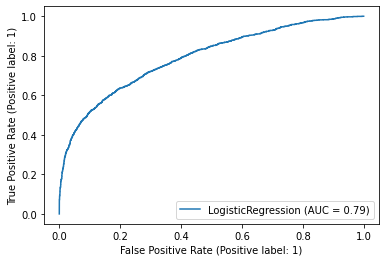

In [ ]:
plot_roc_curve(logreg , X_test, y_test)

# Create Scorecard

## Week 10 Lab (Finding IV for the characteristics and drop weak predictor)

In [ ]:
#To remove the highly correlated variables from the pair
df_filtered = df.drop(['cb_person_cred_hist_length'] , axis = 1)

In [ ]:
df_filtered

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_status,loan_percent_income,cb_person_default_on_file
0,22,RENT,123.0,PERSONAL,1,0.59,Y
1,21,OWN,5.0,EDUCATION,0,0.10,N
2,25,MORTGAGE,1.0,MEDICAL,1,0.57,N
3,23,RENT,4.0,MEDICAL,1,0.53,N
4,24,RENT,8.0,MEDICAL,1,0.55,Y
...,...,...,...,...,...,...,...
32576,57,MORTGAGE,1.0,PERSONAL,0,0.11,N
32577,54,MORTGAGE,4.0,PERSONAL,0,0.15,N
32578,65,RENT,3.0,HOMEIMPROVEMENT,1,0.46,N
32579,56,MORTGAGE,5.0,PERSONAL,0,0.10,N


In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        #for numeric/float columns use pd.qcut to bin
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')

            #save the qcut bins and the 'BAD' column in d0
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
            print(d0)
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
            print(d0)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        print(d)
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        #find the IV for each variable and add it to the newDF in each iteration. This is the IV df
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)

    return newDF, woeDF

In [ ]:
#call the iv_woe function here
iv_df, woe_df = iv_woe(df_filtered, "loan_status")
iv_df.sort_values(by='IV', ascending=False)

                    x  y
0      (19.999, 22.0]  1
1      (19.999, 22.0]  0
2        (24.0, 25.0]  1
3        (22.0, 23.0]  1
4        (23.0, 24.0]  1
...               ... ..
32576    (36.0, 94.0]  0
32577    (36.0, 94.0]  0
32578    (36.0, 94.0]  1
32579    (36.0, 94.0]  0
32580    (36.0, 94.0]  0

[31681 rows x 2 columns]
           Cutoff     N  Events
0  (19.999, 22.0]  4712    1200
1    (22.0, 23.0]  3774     804
2    (23.0, 24.0]  3455     740
3    (24.0, 25.0]  2952     650
4    (25.0, 26.0]  2420     505
5    (26.0, 27.0]  2095     432
6    (27.0, 29.0]  3451     723
7    (29.0, 32.0]  3320     657
8    (32.0, 36.0]  2663     542
9    (36.0, 94.0]  2839     573
Information value of person_age is 0.010294
              x  y
0          RENT  1
1           OWN  0
2      MORTGAGE  1
3          RENT  1
4          RENT  1
...         ... ..
32576  MORTGAGE  0
32577  MORTGAGE  0
32578      RENT  1
32579  MORTGAGE  0
32580      RENT  0

[31681 rows x 2 columns]
     Cutoff      N  Even

,Variable,IV
0,loan_percent_income,0.880722
0,person_home_ownership,0.375057
0,cb_person_default_on_file,0.168975
0,loan_intent,0.096720
0,person_emp_length,0.060930
0,person_age,0.010294


## Week 11 Lab ()

In [ ]:
#If you need to reinstall the scorecardpy library

!pip install git+https://github.com/ShichenXie/scorecardpy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ShichenXie/scorecardpy.git to /tmp/pip-req-build-wclbebgl
  Running command git clone -q https://github.com/ShichenXie/scorecardpy.git /tmp/pip-req-build-wclbebgl
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59524 sha256=1a686e2472592bdd3af52bc290aa91a6b101ee79cc695f19e81da2859f8a43ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-fzgdtl2p/wheels/8d/2e/66/ba8f9e98bb853d0b56fb5b06716976c02777d8add2935a1e12
Successfully built scorecardpy


In [ ]:
#import the scorecardpy package
import scorecardpy as sc
import pprint

# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31681 non-null  int64  
 1   person_home_ownership       31681 non-null  object 
 2   person_emp_length           31681 non-null  float64
 3   loan_intent                 31681 non-null  object 
 4   loan_status                 31681 non-null  int64  
 5   loan_percent_income         31681 non-null  float64
 6   cb_person_default_on_file   31681 non-null  object 
 7   cb_person_cred_hist_length  31681 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.2+ MB


In [ ]:
#To remove the highly correlated variables from the pair
df_filtered = df.drop(['cb_person_cred_hist_length', 'person_age'] , axis = 1)

In [ ]:
bins = sc.woebin(df_filtered, y='loan_status')
print(bins)

[INFO] creating woe binning ...
{'person_emp_length':             variable         bin  count  count_distr   good   bad   badprob  \
0  person_emp_length  [-inf,3.0)  10868     0.343045   7928  2940  0.270519   
1  person_emp_length   [3.0,8.0)  14135     0.446166  11369  2766  0.195684   
2  person_emp_length   [8.0,inf)   6678     0.210789   5558  1120  0.167715   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.300329  0.033558  0.058315    3.0              False  
1 -0.121168  0.006325  0.058315    8.0              False  
2 -0.309590  0.018432  0.058315    inf              False  , 'loan_intent':       variable                                            bin  count  \
0  loan_intent                            VENTURE%,%EDUCATION  11842   
1  loan_intent                                       PERSONAL   5368   
2  loan_intent  HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION  14471   

   count_distr   good   bad   badprob       woe    bin_iv  total_iv  \
0     0.37378

In [ ]:
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

person_emp_length  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_emp_length,"[-inf,3.0)",10868,0.343045,7928,2940,0.270519,0.300329,0.033558,0.058315,3.0,False
1,person_emp_length,"[3.0,8.0)",14135,0.446166,11369,2766,0.195684,-0.121168,0.006325,0.058315,8.0,False
2,person_emp_length,"[8.0,inf)",6678,0.210789,5558,1120,0.167715,-0.309590,0.018432,0.058315,inf,False


----------------------------------------------------------------------------------------------------
loan_intent  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_intent,"VENTURE%,%EDUCATION",11842,0.373789,9962,1880,0.158757,-0.375186,0.047044,0.092608,"VENTURE%,%EDUCATION",False
1,loan_intent,PERSONAL,5368,0.169439,4321,1047,0.195045,-0.125238,0.002563,0.092608,PERSONAL,False
2,loan_intent,"HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION",14471,0.456772,10572,3899,0.269435,0.294831,0.043002,0.092608,"HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION",False


----------------------------------------------------------------------------------------------------
cb_person_default_on_file  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cb_person_default_on_file,N,26052,0.822323,21341,4711,0.180831,-0.21841,0.036794,0.168975,N,False
1,cb_person_default_on_file,Y,5629,0.177677,3514,2115,0.375733,0.78462,0.132181,0.168975,Y,False


----------------------------------------------------------------------------------------------------
loan_percent_income  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_percent_income,"[-inf,0.16)",16787,0.529876,14767,2020,0.120331,-0.696977,0.207838,0.93959,0.16,False
1,loan_percent_income,"[0.16,0.31)",11225,0.354313,9008,2217,0.197506,-0.109638,0.004126,0.93959,0.31,False
2,loan_percent_income,"[0.31,inf)",3669,0.115811,1080,2589,0.705642,2.166631,0.727626,0.93959,inf,False


----------------------------------------------------------------------------------------------------
person_home_ownership  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_home_ownership,OWN,2410,0.076071,2243,167,0.069295,-1.305256,0.085857,0.375057,OWN,False
1,person_home_ownership,MORTGAGE,13091,0.413213,11461,1630,0.124513,-0.658050,0.146299,0.375057,MORTGAGE,False
2,person_home_ownership,"OTHER%,%RENT",16180,0.510716,11151,5029,0.310816,0.496012,0.142901,0.375057,"OTHER%,%RENT",False


----------------------------------------------------------------------------------------------------


{'person_emp_length': <Figure size 432x288 with 2 Axes>,
 'loan_intent': <Figure size 432x288 with 2 Axes>,
 'cb_person_default_on_file': <Figure size 432x288 with 2 Axes>,
 'loan_percent_income': <Figure size 432x288 with 2 Axes>,
 'person_home_ownership': <Figure size 432x288 with 2 Axes>}

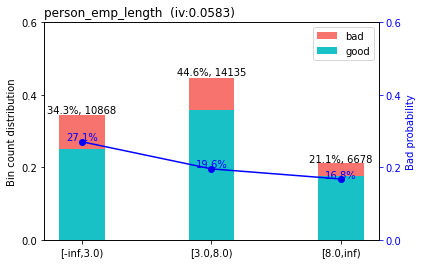

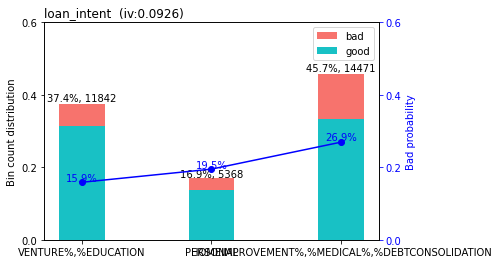

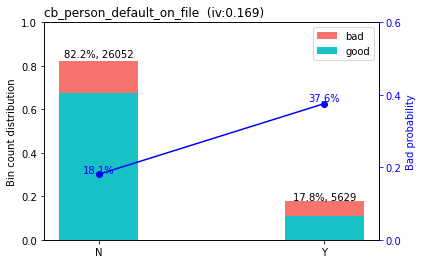

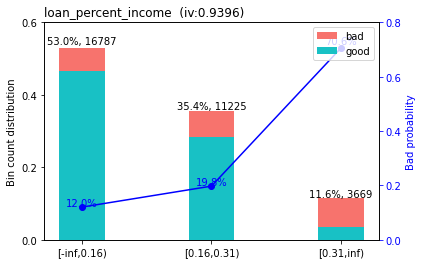

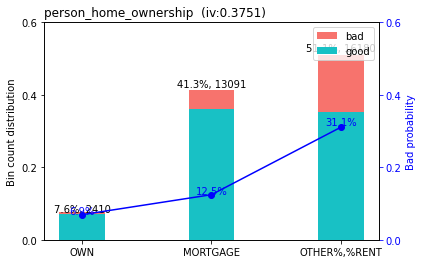

In [ ]:
# Plot the bins
sc.woebin_plot(bins)

In [ ]:
#Split data into 70% train and 30% test
train, test = sc.split_df(df_filtered, 'loan_status', ratio=0.7).values()
print(train.shape)
print(test.shape)

(22176, 6)
(9505, 6)


In [ ]:
# Prepare a dataset with the WOE values for Logistic Regression training. woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,loan_status,loan_intent_woe,person_emp_length_woe,cb_person_default_on_file_woe,loan_percent_income_woe,person_home_ownership_woe
0,1,-0.125238,-0.309590,0.78462,2.166631,0.496012
1,0,-0.375186,-0.121168,-0.21841,-0.696977,-1.305256
2,1,0.294831,0.300329,-0.21841,2.166631,-0.658050
4,1,0.294831,-0.309590,0.78462,2.166631,0.496012
5,1,-0.375186,0.300329,-0.21841,-0.109638,-1.305256
...,...,...,...,...,...,...
32575,0,-0.375186,0.300329,-0.21841,-0.696977,0.496012
32576,0,-0.125238,0.300329,-0.21841,-0.696977,-0.658050
32577,0,-0.125238,-0.121168,-0.21841,-0.696977,-0.658050
32578,1,0.294831,-0.121168,-0.21841,2.166631,0.496012


In [ ]:
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'loan_status']
X_train = train_woe.loc[:,train_woe.columns != 'loan_status']
y_test = test_woe.loc[:,'loan_status']
X_test = test_woe.loc[:,train_woe.columns != 'loan_status']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[1.31197266 0.69415821 1.14138673 1.10297933 1.0073351 ]]
[-1.30741082]


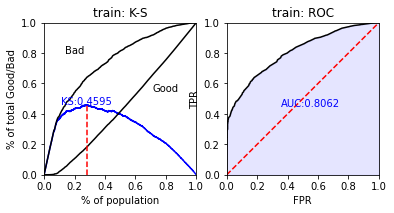

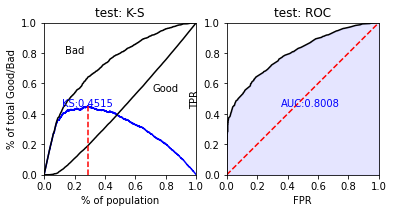

In [ ]:
# Evaluate the performance of the Logistic Regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [ ]:
# Generate model predictions on test data. Print Evaluation metrics of the model
y_pred = lr.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8388
           1       0.42      0.78      0.55      1117

    accuracy                           0.85      9505
   macro avg       0.70      0.82      0.73      9505
weighted avg       0.90      0.85      0.87      9505

[[7210 1178]
 [ 247  870]]


In [ ]:
#generate a card from the model and bins. The scores will be based on probability of default from the model
card = sc.scorecard(bins, lr, X_train.columns)

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

In [ ]:
test_score

,score
3,270.0
6,344.0
8,320.0
14,494.0
15,581.0
...,...
32562,631.0
32564,516.0
32568,539.0
32572,601.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e8f701810>]],
      dtype=object)

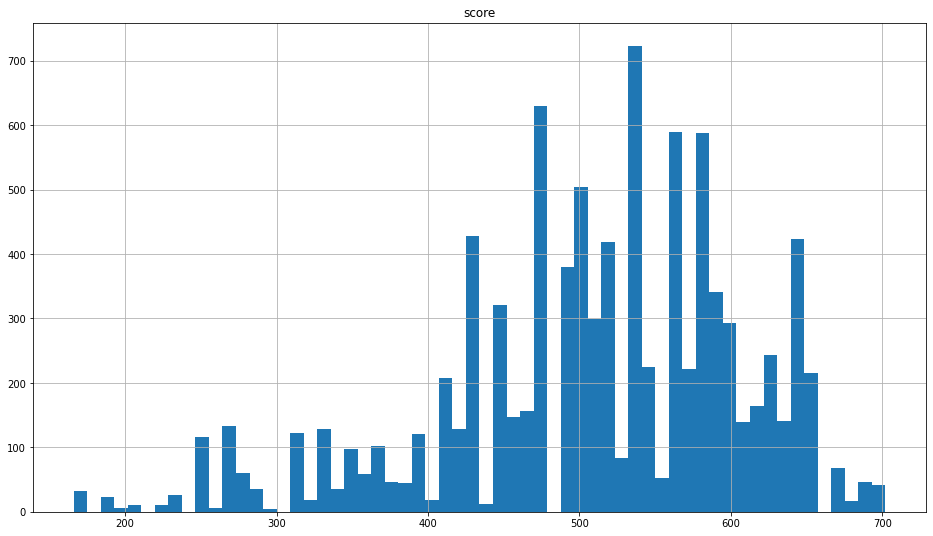

In [ ]:
#distrubution of scores on test data
test_score.hist(figsize=(16,9),bins=60)

In [ ]:
#Minimum acceptable value is 482
pprint.pprint(card)

{'basepoints':      variable  bin  points
0  basepoints  NaN   482.0,
 'cb_person_default_on_file':                     variable bin  points
6  cb_person_default_on_file   N    18.0
7  cb_person_default_on_file   Y   -65.0,
 'loan_intent':       variable                                            bin  points
3  loan_intent                            VENTURE%,%EDUCATION    36.0
4  loan_intent                                       PERSONAL    12.0
5  loan_intent  HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION   -28.0,
 'loan_percent_income':                variable          bin  points
8   loan_percent_income  [-inf,0.16)    55.0
9   loan_percent_income  [0.16,0.31)     9.0
10  loan_percent_income   [0.31,inf)  -172.0,
 'person_emp_length':             variable         bin  points
0  person_emp_length  [-inf,3.0)   -15.0
1  person_emp_length   [3.0,8.0)     6.0
2  person_emp_length   [8.0,inf)    16.0,
 'person_home_ownership':                  variable           bin  points
11  person_ho

In [ ]:
#scorecard with base points adjusted
card = sc.scorecard(bins, lr, X_train.columns, basepoints_eq0= True, digits=5)
pprint.pprint(card)

{'basepoints':      variable  bin  points
0  basepoints  NaN       0,
 'cb_person_default_on_file':                     variable bin  points
6  cb_person_default_on_file   N   114.0
7  cb_person_default_on_file   Y    32.0,
 'loan_intent':       variable                                            bin  points
3  loan_intent                            VENTURE%,%EDUCATION   132.0
4  loan_intent                                       PERSONAL   108.0
5  loan_intent  HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION    68.0,
 'loan_percent_income':                variable          bin  points
8   loan_percent_income  [-inf,0.16)   152.0
9   loan_percent_income  [0.16,0.31)   105.0
10  loan_percent_income   [0.31,inf)   -76.0,
 'person_emp_length':             variable         bin  points
0  person_emp_length  [-inf,3.0)    81.0
1  person_emp_length   [3.0,8.0)   102.0
2  person_emp_length   [8.0,inf)   112.0,
 'person_home_ownership':                  variable           bin  points
11  person_ho

# Analysis and Tuning